In [1]:
## ------------  Change this folder to reflect where you are saving this file ---------- ##

root_folder = '.'

## ------------ ONLY EDIT THIS SECTION ------------------------------------------------- ##

In [2]:
# Basic Data Manipulation Libraries
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm 

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Modeling Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier


# (I) Data Import

## (I.i) Add Data: Sale Prices 

In [3]:
os.chdir(root_folder)
filenames = os.listdir(root_folder + '/Data')

print(filenames)

['Sale_Prices_Zip.csv', 'StateNames.csv', 'DaysOnZillow_County.csv', 'openFEMA_claims20190831.csv', 'laucntycur14_edit.xlsx', 'Zip_Zhvi_AllHomes.csv', 'storm_flood events_by_zip.csv', 'processing_code']


In [4]:
sale_prices = pd.read_csv("Data/Sale_Prices_Zip.csv", engine = 'python')

sale_prices.head()

,RegionID,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,61639,10025,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,932100.0,907100.0,964800.0,925100.0,973600.0,946000.0,984000.0,953500.0,1020900.0,1039000.0,1128800.0,1060400.0,990300.0,913300.0,921900.0,935800.0,926800.0,965600,935400,1047100,1048200,1030700,968700,1005400,1073800,1127600,1040300,957100,931700,921400,1066800,1038000.0,1218400.0,1024700.0,1031100.0,837800.0,965500.0,896100.0,873100.0,852000.0,869200.0,910000.0
1,84654,60657,Illinois,2,370100.0,391300.0,388700.0,382200.0,381300.0,378500.0,364600.0,362300.0,357100.0,365000.0,355300.0,384500.0,384500.0,381700.0,354100.0,359400.0,368600.0,384700.0,370100.0,351400.0,330900.0,346800.0,363900.0,385300.0,373900.0,375300.0,364000.0,371500.0,373500.0,375500.0,404500.0,400600.0,411500.0,386500.0,394100.0,381100.0,371600.0,366400.0,369000.0,376000.0,379100.0,389700.0,400600.0,393200.0,369400.0,359400.0,357400.0,358000.0,349700.0,358800.0,363900.0,364800.0,352000.0,346800.0,362800.0,362000.0,371400.0,342400.0,341900.0,357300.0,363000.0,361900.0,349800.0,358100.0,370200.0,366200.0,367900.0,355800.0,348100.0,364300.0,368400.0,374500.0,350400.0,364500.0,376100.0,404400.0,389900.0,376100.0,378200.0,395800.0,410200.0,393500.0,386900.0,387000.0,389900.0,383600.0,372400.0,369300.0,362300.0,353300.0,336300.0,330000.0,312700.0,324000.0,308700.0,314400.0,311800.0,322700.0,327400.0,323200.0,334700.0,345800.0,336200.0,324200.0,318300.0,313500.0,328100.0,318000.0,333100.0,330400.0,331800.0,315700.0,303300.0,306400.0,329000.0,358900.0,370000.0,368900.0,364300.0,364700,372000,331700,322500,317400,371200,395500,407600,405200,417400,419600,429300,424100,407000,379600.0,371300.0,398000.0,418200.0,424500.0,425700.0,411900.0,400500.0,390300.0,363800.0,380900.0
2,61637,10023,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1145600.0,1132900.0,1160600.0,1341900.0,1310400.0,1276800.0,1235500.0,1293400.0,1203400.0,1153300.0,1081800.0,1142300.0,1134500.0,1163100.0,1187800.0,1176300.0,1236400.0,1286000.0,1179700,1209000,1179900,1169300,1109200,981600,1088500,1087600,1117700,1035400,1059800,1131100,1239500,1181

In [5]:
print(sale_prices.shape)
print(sale_prices.isna().sum())

(6430, 148)
RegionID         0
RegionName       0
StateName        0
SizeRank         0
2008-03       4010
2008-04       4009
2008-05       4009
2008-06       4003
2008-07       3998
2008-08       3988
2008-09       3981
2008-10       3979
2008-11       3978
2008-12       3976
2009-01       3972
2009-02       3961
2009-03       3941
2009-04       3886
2009-05       3841
2009-06       3816
2009-07       3790
2009-08       3764
2009-09       3712
2009-10       3705
2009-11       3694
2009-12       3678
2010-01       3668
2010-02       3655
2010-03       3644
2010-04       3604
2010-05       3567
2010-06       3534
2010-07       3513
2010-08       3499
2010-09       3472
2010-10       3460
2010-11       3442
2010-12       3417
2011-01       3400
2011-02       3382
2011-03       3352
2011-04       3305
2011-05       3224
2011-06       3190
2011-07       3156
2011-08       3132
2011-09       3098
2011-10       3071
2011-11       3049
2011-12       3028
2012-01       3000
2012-02       2967


In [6]:
# Filter the SALE PRICE to the most recent month with available data 
ZILLOW_MONTH = '2020-01'
sale_prices['SALE_PRICE'] = sale_prices[ZILLOW_MONTH]

# Clean the ZIP Code 
sale_prices['ZIP'] = sale_prices['RegionName']
sale_prices['ZIP'] = sale_prices['ZIP'].astype(str)

# Clean the STATE NAME 
sale_prices['STATE_FULL'] = sale_prices['StateName']
sale_prices['STATE_FULL'] = sale_prices['STATE_FULL'].str.upper()

# Narrow the dataset 
sale_small = sale_prices.loc[:, ['ZIP', 'STATE_FULL','SALE_PRICE']]

In [7]:
sale_small.head()

,ZIP,STATE_FULL,SALE_PRICE
0,10025,NEW YORK,869200.0
1,60657,ILLINOIS,363800.0
2,10023,NEW YORK,1051200.0
3,77494,TEXAS,316900.0
4,60614,ILLINOIS,570900.0


## (I.ii) Add Data: ZHVI Estimates

In [8]:
zhvi_prices =  pd.read_csv('Data/Zip_Zhvi_AllHomes.csv', engine = 'python')

zhvi_prices.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,1999-11,1999-12,2000-01,2000-02,2000-03,2000-04,2000-05,2000-06,2000-07,2000-08,2000-09,2000-10,2000-11,2000-12,2001-01,2001-02,2001-03,2001-04,2001-05,2001-06,2001-07,2001-08,2001-09,2001-10,2001-11,2001-12,2002-01,2002-02,2002-03,2002-04,2002-05,2002-06,2002-07,2002-08,2002-09,2002-10,2002-11,2002-12,2003-01,2003-02,2003-03,2003-04,2003-05,2003-06,2003-07,2003-08,2003-09,2003-10,2003-11,2003-12,2004-01,2004-02,2004-03,2004-04,2004-05,2004-06,2004-07,2004-08,2004-09,2004-10,2004-11,2004-12,2005-01,2005-02,2005-03,2005-04,2005-05,2005-06,2005-07,2005-08,2005-09,2005-10,2005-11,2005-12,2006-01,2006-02,2006-03,2006-04,2006-05,2006-06,2006-07,2006-08,2006-09,2006-10,2006-11,2006-12,2007-01,2007-02,2007-03,2007-04,2007-05,2007-06,2007-07,2007-08,2007-09,2007-10,2007-11,2007-12,2008-01,2008-02,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,2008-10,2008-11,2008-12,2009-01,2009-02,2009-03,2009-04,2009-05,2009-06,2009-07,2009-08,2009-09,2009-10,2009-11,2009-12,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02
0,61639,10025,New York,NY,New York-Newark-Jersey City,New York County,1,226925.0,227445.0,228076.0,227964.0,228764.0,229112.0,230702.0,231924.0,233457.0,234888.0,237721.0,239326.0,240234.0,241050.0,241910.0,244489.0,245018.0,246629.0,246292.0,248251.0,250814.0,254191.0,257421.0,261529.0,266281.0,270044.0,274009.0,276537.0,281431.0,286134.0,292547.0,296256.0,298905.0,301648.0,304459.0,307437.0,309574.0,313768.0,318820.0,326824.0,334498.0,343120.0,350602.0,358870.0,367059.0,373466.0,380723.0,388003.0,397901.0,406847.0,415219.0,423274.0,430131.0,436649.0,442652.0,451124.0,460202.0,471158.0,481267.0,491928.0,499822.0,505670.0,510097.0,513601.0,518012.0,522909.0,529584.0,534760.0,540483.0,544664.0,549510.0,553213.0,558698.0,563771.0,567651.0,569003.0,571457.0,575912.0,581341.0,587644.0,593070.0,599166.0,605167.0,611441.0,618395.0,630282.0,648460.0,669484.0,686533.0,694998.0,699614.0,703013.0,709679.0,715455.0,721799.0,726163.0,733779.0,738285.0,742333.0,747982.0,758580.0,779032.0,795724.0,809791.0,815133.0,824617.0,835077.0,857201.0,874491.0,890420.0,900508.0,910304.0,924240.0,934650.0,956916.0,977490.0,998098.0,1019236.0,1036660.0,1042028.0,1034880.0,1035217.0,1046283.0,1052498.0,1044629.0,1024966.0,1003666.0,992146.0,999059.0,998130.0,999169.0,990059.0,991338.0,991064.0,985522.0,988466.0,984572.0,988771.0,988293.0,989606.0,986261.0,986732.0,983095.0,986885.0,991833.0,987223.0,977744.0,964208.0,973695.0,988682.0,1003185.0,1004772.0,997465.0,986749.0,976099.0,970579.0,967194.0,969691.0,967868.0,954298.0,932066.0,907276.0,888472.0,879986.0,872262.0,867289.0,863727.0,862047.0,862896.0,861610.0,865744.0,878202.0,889197.0,89915

In [9]:
# Filter Zillow ZHVI Price to most recent month 
ZILLOW_MONTH = '2020-01'
zhvi_prices['ZHVI'] = zhvi_prices[ZILLOW_MONTH]

# Clean ZIP Codes
zhvi_prices['ZIP'] = zhvi_prices['RegionName']
zhvi_prices['ZIP'] = zhvi_prices['ZIP'].astype(str)

# Clean COUNTY Names 
zhvi_prices['COUNTY'] = zhvi_prices['CountyName'].str.replace('County',"")
zhvi_prices['COUNTY'] = zhvi_prices['COUNTY'].str.upper()  
zhvi_prices['COUNTY'] = zhvi_prices['COUNTY'].str.rstrip()

# Clean STATE 
zhvi_prices['STATE'] = zhvi_prices['State']

# Clean CITY 
zhvi_prices['CITY'] = zhvi_prices['City']

# Narrow Dataset 
zhvi_small = zhvi_prices.loc[:,['ZIP','CITY','COUNTY','STATE','ZHVI']]

In [10]:
zhvi_small.head()

,ZIP,CITY,COUNTY,STATE,ZHVI
0,10025,New York,NEW YORK,NY,1181398
1,60657,Chicago,COOK,IL,485195
2,10023,New York,NEW YORK,NY,1159578
3,77494,Katy,HARRIS,TX,334610
4,60614,Chicago,COOK,IL,629578


In [11]:
print(zhvi_small.shape)
zhvi_small.isna().sum()

(30494, 5)


ZIP       0
CITY      0
COUNTY    0
STATE     0
ZHVI      0
dtype: int64

## (I.iii) Add Data: NOAA Storm Data: Use this for Coastal Limits

In [12]:
noaa_data = pd.read_csv('Data/storm_flood events_by_zip.csv', engine = 'python')

print(noaa_data.shape)
print(noaa_data.isna().sum())

noaa_data.head()

(3552, 7)
Unnamed: 0                    0
ZIP                           0
State                         0
County                        0
coastal_flood_events_96_19    0
State_abbrev                  0
County_FIPS                   0
dtype: int64


,Unnamed: 0,ZIP,State,County,coastal_flood_events_96_19,State_abbrev,County_FIPS
0,0,501,NEW YORK,SUFFOLK,2,NY,36103
1,1,1504,MASSACHUSETTS,PLYMOUTH,6,MA,25021
2,2,1746,MASSACHUSETTS,PLYMOUTH,6,MA,25021
3,3,1756,MASSACHUSETTS,PLYMOUTH,6,MA,25021
4,4,1760,MASSACHUSETTS,PLYMOUTH,6,MA,25021


In [13]:
## Fix Zip Codes into having padded Zeros 
noaa_data['ZIP'] = noaa_data['ZIP'].astype(int)
noaa_data['ZIP'] = noaa_data['ZIP'].astype(str).str.zfill(5)

# Clean COUNTY FIPS Code
noaa_data['COUNTY_FIPS'] = noaa_data['County_FIPS'].astype(int)
noaa_data['COUNTY_FIPS'] = noaa_data['County_FIPS'].astype(str).str.zfill(5)

# Clean STATE Abbreviation 
noaa_data['STATE'] = noaa_data['State_abbrev']

# Clean COUNTY Name 
noaa_data['COUNTY'] = noaa_data['County']
noaa_data['COUNTY'] = noaa_data['COUNTY'].str.replace("\(C\)","")
noaa_data['COUNTY'] = noaa_data['COUNTY'].str.rstrip()
noaa_data['COUNTY'] = noaa_data['COUNTY'].str.replace("PARISH","")

In [14]:
# Group to County Level 
noaa_by_county = noaa_data.groupby(['COUNTY','STATE']).agg(
    COUNTY_FIPS = pd.NamedAgg(column = 'COUNTY_FIPS', aggfunc = lambda x: x.value_counts().index[0]),
    COASTAL_FLOOD_EVENTS_96_19 = pd.NamedAgg(column = 'coastal_flood_events_96_19', aggfunc = 'sum') 
)

noaa_by_county = noaa_by_county.reset_index()


# Group to a Zip Level 
noaa_by_zip = noaa_data.groupby(['ZIP','COUNTY_FIPS','COUNTY','STATE']).agg(
                COASTAL_FLOOD_EVENTS_96_19  = pd.NamedAgg(column = 'coastal_flood_events_96_19', aggfunc = 'sum')
             )

noaa_by_zip = noaa_by_zip.reset_index()
print(noaa_by_zip.shape)

(3552, 5)


In [15]:
noaa_by_zip.head()

,ZIP,COUNTY_FIPS,COUNTY,STATE,COASTAL_FLOOD_EVENTS_96_19
0,00501,36103,SUFFOLK,NY,2
1,01504,25021,PLYMOUTH,MA,6
2,01746,25021,PLYMOUTH,MA,6
3,01756,25021,PLYMOUTH,MA,6
4,01760,25021,PLYMOUTH,MA,6


In [16]:
coastal_counties = noaa_by_county.loc[:,['COUNTY','STATE']]
print(coastal_counties.shape)

coastal_zips = noaa_by_zip.loc[:,['ZIP','COUNTY','STATE']]

#use for FEMA import 
coastal_zip_list = list(noaa_by_zip['ZIP']) 

(97, 2)


## (I.iv) Add Data for Zillow Time to Sale


In [17]:
tts = pd.read_csv('Data/DaysOnZillow_County.csv', engine = 'python')

tts.head()

,SizeRank,RegionID,RegionName,RegionType,StateName,2010-01,2010-02,2010-03,2010-04,2010-05,2010-06,2010-07,2010-08,2010-09,2010-10,2010-11,2010-12,2011-01,2011-02,2011-03,2011-04,2011-05,2011-06,2011-07,2011-08,2011-09,2011-10,2011-11,2011-12,2012-01,2012-02,2012-03,2012-04,2012-05,2012-06,2012-07,2012-08,2012-09,2012-10,2012-11,2012-12,2013-01,2013-02,2013-03,2013-04,2013-05,2013-06,2013-07,2013-08,2013-09,2013-10,2013-11,2013-12,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01
0,1,3101,Los Angeles County,County,CA,120.0,129.0,120.0,106.0,87.0,94.0,88.0,90.0,92.0,97.0,100.0,106.0,111.0,117.0,113.0,95.0,94.0,100.0,101.0,99.0,106.0,108.0,108.0,113.0,114.0,115.0,113.0,98.0,93.0,90.0,89.0,86.0,85.0,85.0,83.0,88.0,92.0,88.0,75.0,68.0,64.0,66.0,64.0,63.0,66.0,68.0,70.0,73.0,83.0,82.0,65.0,65.0,64.0,68.0,69.0,69.0,72.0,75.0,76.0,81.0,89.0,90.0,70.0,63.0,65.0,67.0,68.0,68.0,69.0,72.0,77.0,81.0,86.0,89.0,68.0,65.0,66.0,66.0,66.0,67.0,70.0,72.0,75.0,78.0,85.0,86.0,66.0,61.0,60.0,59.0,60.0,60.0,64.0,64.0,64.0,69.0,75.0,66.0,55.0,55.0,55.0,56.0,58.0,58.0,62.0,67.0,69.0,74.0,85.0,88.0,70.0,64.0,62.0,62.0,64.0,65.0,68.0,69.0,67.0,73.0,80.0
1,2,139,Cook County,County,IL,186.0,190.0,198.0,195.0,178.0,131.0,137.0,120.0,125.0,136.0,145.0,156.0,153.0,151.0,151.0,149.0,131.0,128.0,131.0,137.0,143.0,150.0,144.0,146.0,148.0,145.0,151.0,140.0,125.0,115.0,119.0,122.0,120.0,126.0,127.0,135.0,141.0,142.0,139.0,130.0,106.0,105.0,110.0,105.0,110.0,109.0,104.0,106.0,121.0,128.0,130.0,107.0,91.0,87.0,93.0,98.0,106.0,106.0,108.0,115.0,126.5,127.0,125.0,99.0,92.0,92.0,98.0,103.0,108.0,111.0,110.5,116.0,127.0,133.0,127.0,96.0,91.0,92.0,91.0,94.0,99.0,103.0,110.0,114.0,126.0,131.0,116.0,87.0,81.0,84.0,87.0,88.0,92.0,96.0,98.0,103.0,120.0,131.0,98.0,70.0,76.0,83.0,84.0,85.0,91.0,94.0,98.0,110.0,119.0,132.0,126.0,77.0,71.0,77.0,83.0,86.0,92.0,98.0,97.0,105.0,121.0
2,3,1090,Harris County,County,TX,124.0,130.0,128.0,110.0,92.0,98.0,98.0,98.0,105.0,115.0,124.0,128.0,133.0,128.0,125.0,117.0,109.0,104.5,108.0,111.0,116.0,119.0,124.0,123.0,120.0,117.0,112.0,96.0,90.0,90.0,93.0,100.0,101.0,102.0,97.0,101.0,103.0,102.0,86.5,75.0,71.0,70.0,69.0,67.0,70.0,76.0,75.0,78.0,84.0,81.0,64.0,64.0,62.0,62.0,59.0,57.0,63.0,67.0,68.0,70.0,76.0,69.0,59.0,61.0,60.0,61.0,62.0,62.0,64.0,69.0,75.0,80.0,89.0,88.0,73.0,67.0,65.0,69.0,69.0,69.0,72.0,81.0,82.0,83.0,88.0,90.0,72.0,68.0,65.0,66.0,67.0,69.0,79.0,89.0,91.0,81.0,82.0,88.0,68.0,59.0,60.0,63.0,67.0,67.0,73.0,80.0,86.0,88.0,91.0,90.5,82.0,72.0,69.0,68.0,67.0,70.0,79.0,87.0,90.0,92.0,100.0
3,4,2402,Maricopa County,County,AZ,111.0,113.0,117.0,115.0,109.0,108.0,94.0,96.0,100.0,98.0,95.0,105.0,113.0,112.0,117.0,103.0,103.0,100.0,92.0,92.0,89.0,88.0,88.0,89.0,96.0,102.0,92.0,85.0,86.0,85.0,84.0,79.0,81.0,81.0,81.0,89.0,94.0,92.0,84.0,78.0,72.0,68.0,69.0,68.0,71.0,73.0,74.0,76.0,90.0,94.0,81.0,80.0,83.0,87.0,88.0,89.0,89.0,88.0,80.0,82.0,92.0,86.0,72.0,71.0,68.0,71.0,65.0,66.0,68.0,67.0,69.0,73.0,81.0,82.0,69.0,68.0,70.0,70.0,71.0,72.0,72.0,69.0,68.0,71.0,79.5,78.0,65.0,65.0,64.0,64.0,63.0,62.0,63.0,62.0,61.0,65.0,74.0,68.0,58.0,55.0,56.0,56.0,57.0,59.0,60.0,58.0,58.0,63.0,72.0,71.0,61.0,60.0,57.0,58.0,58.0,56.0,53.0,52.0,52.0,55.0,62.0
4,5,2841,San Diego County,County,CA,105.0,110.0,97.0,104.5,91.0,91.0,76.0,82.0,95.0,96.0,103.0,107.0,110.0,113.0,113.0,98.0,97.0,101.5,104.0,101.0,98.5,104.0,102.0,116.0,125.0,125.0,110.0,97.0,89.0,89.0,89.0,89.0,92.0,87.0,88.0,91.0,86.0,85.0,67.0,61.0,62.0,59.0,59.0,58.0,60.0,63

In [18]:
# Filter to January 2020 Days to Sale 
ZILLOW_MONTH = '2020-01'
tts['DaysToSale'] = tts[ZILLOW_MONTH]

# Clean the COUNTY 
tts['COUNTY'] = tts['RegionName'].str.replace("County","")
tts['COUNTY'] = tts['COUNTY'].str.upper()
tts['COUNTY'] = tts['COUNTY'].str.rstrip()

# Clean the STATE 
tts['STATE'] = tts['StateName']

# Filter to Necessary Columns 
tts_small = tts.loc[:, ['COUNTY','STATE','DaysToSale']]

In [19]:
tts_small.head()

,COUNTY,STATE,DaysToSale
0,LOS ANGELES,CA,80.0
1,COOK,IL,121.0
2,HARRIS,TX,100.0
3,MARICOPA,AZ,62.0
4,SAN DIEGO,CA,74.0


## (I.v) Add Data - From FEMA Claims Dataset

In [20]:
date_cols = ['dateofloss', 'asofdate','originalconstructiondate','originalnbdate']

sample = pd.read_csv('Data/openFEMA_claims20190831.csv', engine = 'python', nrows = 100)

sample_size = sample.memory_usage(index=True).sum()
print(sample_size)

sample.head()

31328


,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,censustract,floodzone,houseworship,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,numberoffloorsintheinsuredbuilding,nonprofitindicator,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
0,NaN,2019-08-31,NaN,0,OCEANSIDE,N,1,6073,0.00,1998-02-07,N,NaN,999,6.073019e+09,X,NaN,33.2,NaN,-117.3,NaN,NaN,4,NaN,10.0,1,1963-01-01,1997-01-11,0.00,0.0,NaN,N,7.0,NaN,CA,200000,50000,1998,92056,NaN
1,NaN,2019-08-31,NaN,0,NEW ORLEANS,N,1,22071,0.00,2005-08-29,N,NaN,999,2.207100e+10,X,NaN,29.9,NaN,-90.0,NaN,NaN,2,NaN,10.0,1,1967-07-01,1990-07-12,0.00,0.0,NaN,N,7.0,NaN,LA,100000,40000,2005,70131,Y
2,NaN,2019-08-31,NaN,0,NAVARRE,N,1,12113,0.05,1998-09-28,N,NaN,999,1.211301e+10,X,NaN,30.4,NaN,-86.9,NaN,NaN,1,NaN,10.0,1,1972-01-01,1997-07-24,8813.21,1720.0,0.0,N,1.0,NaN,FL,100000,50000,1998,32566,NaN
3,NaN,2019-08-31,NaN,1,BEAUFORT,N,1,45013,0.00,1994-10-07,N,NaN,999,4.501300e+10,X,NaN,32.4,NaN,-80.7,NaN,NaN,2,NaN,10.0,1,1960-01-01,1993-10-01,2906.00,0.0,NaN,N,7.0,NaN,SC,100000,25000,1994,29902,NaN
4,NaN,2019-08-31,NaN,0,MELBOURNE,N,1,12009,0.00,1996-03-11,N,NaN,999,1.200906e+10,X,NaN,28.3,NaN,-80.7,NaN,NaN,1,NaN,10.0,1,1988-01-01,1996-01-11,3875.53,1545.0,NaN,Y,7.0,NaN,FL,100000,25000,1996,32940,NaN


### Use the NOAA Coastal Zip Code List for which Zip Codes to includes in this model: Import 5 recent years of claims due to size constraints 

In [21]:
my_chunk = (1000000000 / sample_size)/100
my_chunk = int(my_chunk//1) 
print (my_chunk)

# create the iterator
iter_csv = pd.read_csv(
    root_folder + '/Data/openFEMA_claims20190831.csv',
    iterator=True,
    engine='python',
    chunksize=my_chunk)

fema_recent = pd.concat(
    [chunk[(chunk['reportedzipcode'].isin(coastal_zip_list)) 
           & (chunk['yearofloss'].isin([2019,2018,2017,2016,2015]) )]
    for chunk in iter_csv])

319


In [22]:
print(fema_recent.shape)
fema_recent.head()

(24387, 39)


,agriculturestructureindicator,asofdate,basefloodelevation,basementenclosurecrawlspacetype,reportedcity,condominiumindicator,policycount,countycode,crsdiscount,dateofloss,elevatedbuildingindicator,elevationcertificateindicator,elevationdifference,censustract,floodzone,houseworship,latitude,locationofcontents,longitude,lowestadjacentgrade,lowestfloorelevation,numberoffloorsintheinsuredbuilding,nonprofitindicator,obstructiontype,occupancytype,originalconstructiondate,originalnbdate,amountpaidonbuildingclaim,amountpaidoncontentsclaim,amountpaidonincreasedcostofcomplianceclaim,postfirmconstructionindicator,ratemethod,smallbusinessindicatorbuilding,state,totalbuildinginsurancecoverage,totalcontentsinsurancecoverage,yearofloss,reportedzipcode,primaryresidence
84,N,2019-08-31,NaN,1.0,SCITUATE,N,1.0,25023.0,0.0,2018-03-02,N,NaN,999.0,2.502351e+10,X,N,42.2,NaN,-70.7,NaN,NaN,3.0,N,NaN,1.0,1981-07-01,2015-09-26,3201.31,0.00,0.0,Y,NaN,N,MA,250000.0,100000.0,2018,2066,N
85,N,2019-08-31,NaN,1.0,SCITUATE,N,1.0,25023.0,0.0,2018-06-09,N,NaN,999.0,2.502351e+10,X,N,42.2,NaN,-70.7,NaN,NaN,3.0,N,NaN,1.0,1981-07-01,2015-09-26,0.00,0.00,NaN,Y,NaN,N,MA,250000.0,100000.0,2018,2066,N
298,N,2019-08-31,NaN,0.0,SANTA BARBARA,N,1.0,6083.0,0.0,2017-02-17,N,NaN,999.0,6.083001e+09,X,N,34.4,NaN,-119.7,NaN,NaN,1.0,N,NaN,1.0,1957-01-01,2016-01-10,3127.25,0.00,0.0,N,7,N,CA,250000.0,100000.0,2017,93108,Y
846,N,2019-08-31,NaN,0.0,CRYSTAL RIVER,N,1.0,12017.0,0.0,2016-09-01,N,NaN,999.0,1.201745e+10,AE,N,28.9,NaN,-82.6,NaN,NaN,1.0,N,NaN,1.0,1981-07-01,1986-07-10,127958.85,36047.67,0.0,N,1,N,FL,224000.0,80000.0,2016,34428,Y
1091,N,2019-08-31,NaN,0.0,CRYSTAL RIVER,N,1.0,12017.0,0.0,2016-09-02,N,NaN,999.0,1.201745e+10,AE,N,28.9,NaN,-82.6,NaN,NaN,1.0,N,NaN,1.0,1974-07-01,1988-07-14,28623.46,581.97,0.0,N,1,N,FL,250000.0,100000.0,2016,34429,Y


In [23]:
## Clean Zip Codes to Pad with Zeros 
fema_recent['ZIP'] = fema_recent['reportedzipcode'].astype(int)
fema_recent['ZIP'] = fema_recent['ZIP'].astype(str).str.zfill(5)

# ---- Add columns ---- 
# Create a Total Paid column 
fema_recent['totalpaid'] = fema_recent['amountpaidonbuildingclaim'] + fema_recent['amountpaidoncontentsclaim']  + fema_recent['amountpaidonincreasedcostofcomplianceclaim']

# Create a Flood Group Column 
fema_recent['floodzone'] = fema_recent['floodzone'].fillna('D')
fema_recent['floodgroup'] = 'D'
fema_recent.loc[fema_recent['floodzone'].str.contains(r'X'), 'floodgroup'] = 'ZoneX'
fema_recent.loc[fema_recent['floodzone'].str.contains(r'V'), 'floodgroup'] = 'ZoneV'
fema_recent.loc[fema_recent['floodzone'].str.contains(r'D'), 'floodgroup'] = 'ZoneD'
fema_recent.loc[fema_recent['floodzone'].str.contains(r'C'), 'floodgroup'] = 'ZoneC'
fema_recent.loc[fema_recent['floodzone'].str.contains(r'B'), 'floodgroup'] = 'ZoneB'
fema_recent.loc[fema_recent['floodzone'].str.contains(r'A'), 'floodgroup'] = 'ZoneA'

# Create a Coastal Column 
fema_recent['coastal'] = 0
fema_recent.loc[fema_recent['floodzone'].str.contains(r'V'), 'coastal'] = 1

In [24]:
# Keep only relevant columns 
fema_sample = fema_recent.loc[:,['dateofloss','yearofloss','state','ZIP', 
                                   'reportedcity','latitude','longitude',
                         'amountpaidonbuildingclaim','amountpaidoncontentsclaim',
                                   'amountpaidonincreasedcostofcomplianceclaim',
                         'totalpaid','floodgroup','floodzone','coastal']]

In [25]:
# https://www.shanelynn.ie/summarising-aggregation-and-grouping-data-in-python-pandas/
# https://stackoverflow.com/questions/15222754/groupby-pandas-dataframe-and-select-most-common-value

fema_by_zip = fema_sample.groupby(['ZIP']).agg(
                paid_on_claims_5year = pd.NamedAgg(column='totalpaid', aggfunc='sum'),
                count_claims_5year = pd.NamedAgg(column='dateofloss', aggfunc='count'),
                #coastal_ind = pd.NamedAgg(column = 'coastal', aggfunc = 'max'),
                most_common_zone = pd.NamedAgg(column = 'floodgroup', aggfunc = lambda x: x.value_counts().index[0]),
                STATE = pd.NamedAgg(column = 'state', aggfunc = lambda x: x.value_counts().index[0])
                )

fema_by_zip = fema_by_zip.reset_index()
fema_by_zip.head()

,ZIP,paid_on_claims_5year,count_claims_5year,most_common_zone,STATE
0,01760,4073.08,3,ZoneC,MA
1,02020,395225.37,20,ZoneA,MA
2,02025,62842.50,21,ZoneA,MA
3,02026,0.00,1,ZoneX,MA
4,02035,0.00,1,ZoneA,MA


In [26]:
fema_by_zip.isna().sum()

ZIP                     0
paid_on_claims_5year    0
count_claims_5year      0
most_common_zone        0
STATE                   0
dtype: int64

## (I.vi) Add Data - Unemployment data by county 

In [27]:
unemployment = pd.read_excel('Data/laucntycur14_edit.xlsx')

unemployment.head()

,LAUS Code,StateFIPSCode,CountyFIPSCode,County Name/State Abbreviation,Period,LaborForce,Employed,Unemployed,UnemploymentRate,County,State
0,CN0100100000000,1.0,1.0,"Autauga County, AL",Jan-19,25808.0,24801.0,1007.0,3.9,Autauga County,AL
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",Jan-19,92160.0,88370.0,3790.0,4.1,Baldwin County,AL
2,CN0100500000000,1.0,5.0,"Barbour County, AL",Jan-19,8250.0,7813.0,437.0,5.3,Barbour County,AL
3,CN0100700000000,1.0,7.0,"Bibb County, AL",Jan-19,8705.0,8319.0,386.0,4.4,Bibb County,AL
4,CN0100900000000,1.0,9.0,"Blount County, AL",Jan-19,25024.0,24046.0,978.0,3.9,Blount County,AL


### Data Cleaning and Narrow Dataset columns 


In [28]:
# Filter to January 2020
unemployment = unemployment[unemployment['Period'] == "Jan-20"]

# Clean & Standardize County Names
unemployment['County'] = unemployment['County'].str.replace("County","")
unemployment['COUNTY'] = unemployment['County'].str.upper()
unemployment['COUNTY'] = unemployment['COUNTY'].str.rstrip()

# Clean & Standardize State Names
unemployment['STATE'] = unemployment['State'].str.upper()

# Preserve Rate as Float 
unemployment['UnemploymentRate'] = unemployment['UnemploymentRate'].astype(float)

# Limit to necessary columns
unemployment_small = unemployment.loc[:, ['COUNTY','STATE','UnemploymentRate']]

In [29]:
unemployment_small.head()

,COUNTY,STATE,UnemploymentRate
38628,AUTAUGA,AL,3.0
38629,BALDWIN,AL,3.1
38630,BARBOUR,AL,3.8
38631,BIBB,AL,3.3
38632,BLOUNT,AL,3.0


In [30]:
unemployment.shape

(3219, 13)

## (I.vii) Add Data - Map State Names to Abbreviations 

In [31]:
state_abbrev =  pd.read_csv('Data/StateNames.csv', engine = 'python')

### Use this to link together Sales_Small with the other datasets 


In [32]:
state_abbrev['STATE_FULL'] = state_abbrev['State']
state_abbrev['STATE_FULL'] = state_abbrev['STATE_FULL'].str.upper()

state_abbrev['STATE'] = state_abbrev['Code']

state_abbrev = state_abbrev.loc[:, ['STATE_FULL','STATE']]

state_abbrev.head()

,STATE_FULL,STATE
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA


# (II) Data Aggregation 

## Combine all datasets together on common join keys, usually ZIP, but also COUNTY and STATE as needed 

In [33]:
## Review Datasets to discover correct join keys

In [34]:
noaa_by_zip.head()

,ZIP,COUNTY_FIPS,COUNTY,STATE,COASTAL_FLOOD_EVENTS_96_19
0,00501,36103,SUFFOLK,NY,2
1,01504,25021,PLYMOUTH,MA,6
2,01746,25021,PLYMOUTH,MA,6
3,01756,25021,PLYMOUTH,MA,6
4,01760,25021,PLYMOUTH,MA,6


In [35]:
state_abbrev.head()

,STATE_FULL,STATE
0,ALABAMA,AL
1,ALASKA,AK
2,ARIZONA,AZ
3,ARKANSAS,AR
4,CALIFORNIA,CA


In [36]:
sale_small.head()

,ZIP,STATE_FULL,SALE_PRICE
0,10025,NEW YORK,869200.0
1,60657,ILLINOIS,363800.0
2,10023,NEW YORK,1051200.0
3,77494,TEXAS,316900.0
4,60614,ILLINOIS,570900.0


In [37]:
zhvi_small.head()


,ZIP,CITY,COUNTY,STATE,ZHVI
0,10025,New York,NEW YORK,NY,1181398
1,60657,Chicago,COOK,IL,485195
2,10023,New York,NEW YORK,NY,1159578
3,77494,Katy,HARRIS,TX,334610
4,60614,Chicago,COOK,IL,629578


In [38]:
fema_by_zip.head()

,ZIP,paid_on_claims_5year,count_claims_5year,most_common_zone,STATE
0,01760,4073.08,3,ZoneC,MA
1,02020,395225.37,20,ZoneA,MA
2,02025,62842.50,21,ZoneA,MA
3,02026,0.00,1,ZoneX,MA
4,02035,0.00,1,ZoneA,MA


In [39]:
tts_small.head()

,COUNTY,STATE,DaysToSale
0,LOS ANGELES,CA,80.0
1,COOK,IL,121.0
2,HARRIS,TX,100.0
3,MARICOPA,AZ,62.0
4,SAN DIEGO,CA,74.0


In [40]:
unemployment_small.head()

,COUNTY,STATE,UnemploymentRate
38628,AUTAUGA,AL,3.0
38629,BALDWIN,AL,3.1
38630,BARBOUR,AL,3.8
38631,BIBB,AL,3.3
38632,BLOUNT,AL,3.0


## Combine all data! 

In [41]:
combine = noaa_by_zip.loc[:, ['ZIP','COUNTY','STATE']]
combine = pd.merge(combine, state_abbrev, how = 'left', left_on = ['STATE'], right_on = ['STATE'])
combine = pd.merge(combine, sale_small, how = 'left', left_on = ['ZIP','STATE_FULL'], right_on = ['ZIP','STATE_FULL'])

combine = pd.merge(combine, zhvi_small, how = 'left', left_on = ['ZIP'], right_on = ['ZIP'])
combine.drop(['CITY','COUNTY_y','STATE_y'],axis = 1, inplace = True)
combine.rename(columns={'COUNTY_x':'COUNTY','STATE_x':'STATE'},inplace=True)

combine = pd.merge(combine, noaa_by_zip, how = 'left', left_on = ['ZIP','STATE'], right_on = ['ZIP','STATE'])
combine.drop(['COUNTY_y'],axis = 1, inplace = True)
combine.rename(columns={'COUNTY_x':'COUNTY'},inplace=True)

combine = pd.merge(combine, fema_by_zip, how = 'left', left_on = ['ZIP'], right_on = ['ZIP'])
combine.drop(['STATE_y'], axis = 1, inplace = True)
combine.rename(columns={'STATE_x':'STATE'}, inplace = True)
combine = pd.merge(combine, tts_small, how = 'left', left_on = ['COUNTY','STATE'], right_on = ['COUNTY','STATE'])
combine = pd.merge(combine, unemployment_small, how = 'left', left_on = ['COUNTY','STATE'], right_on = ['COUNTY','STATE'])

print(combine.shape)

(3552, 13)


In [42]:
combine.head(15)

,ZIP,COUNTY,STATE,STATE_FULL,SALE_PRICE,ZHVI,COUNTY_FIPS,COASTAL_FLOOD_EVENTS_96_19,paid_on_claims_5year,count_claims_5year,most_common_zone,DaysToSale,UnemploymentRate
0,00501,SUFFOLK,NY,NEW YORK,NaN,NaN,36103,2,NaN,NaN,NaN,146.0,4.2
1,01504,PLYMOUTH,MA,MASSACHUSETTS,NaN,NaN,25021,6,NaN,NaN,NaN,98.0,3.6
2,01746,PLYMOUTH,MA,MASSACHUSETTS,NaN,NaN,25021,6,NaN,NaN,NaN,98.0,3.6
3,01756,PLYMOUTH,MA,MASSACHUSETTS,NaN,NaN,25021,6,NaN,NaN,NaN,98.0,3.6
4,01760,PLYMOUTH,MA,MASSACHUSETTS,NaN,NaN,25021,6,4073.08,3.0,ZoneC,98.0,3.6
5,02018,BARNSTABLE,MA,MASSACHUSETTS,NaN,NaN,25023,25,NaN,NaN,NaN,114.0,6.1
6,02019,PLYMOUTH,MA,MASSACHUSETTS,NaN,NaN,25021,6,NaN,NaN,NaN,98.0,3.6
7,02020,BARNSTABLE,MA,MASSACHUSETTS,NaN,NaN,25023,25,395225.37,20.0,ZoneA,114.0,6.1
8,02021,PLYMOUTH,MA,MASSACHUSETTS,NaN,NaN,25021,6,NaN,NaN,NaN,98.0,3.6
9,02025,BARNSTABLE,MA,MASSACHUSETTS,NaN,NaN,25023,25,62842.50,21.0,ZoneA,114.0,6.1


In [43]:
combine.dtypes

ZIP                            object
COUNTY                         object
STATE                          object
STATE_FULL                     object
SALE_PRICE                    float64
ZHVI                          float64
COUNTY_FIPS                    object
COASTAL_FLOOD_EVENTS_96_19      int64
paid_on_claims_5year          float64
count_claims_5year            float64
most_common_zone               object
DaysToSale                    float64
UnemploymentRate              float64
dtype: object

In [44]:
combine.isna().sum()

ZIP                              0
COUNTY                           0
STATE                            0
STATE_FULL                       0
SALE_PRICE                    2819
ZHVI                          1579
COUNTY_FIPS                      0
COASTAL_FLOOD_EVENTS_96_19       0
paid_on_claims_5year          2155
count_claims_5year            2155
most_common_zone              2155
DaysToSale                     482
UnemploymentRate               453
dtype: int64

In [45]:
combine.shape

(3552, 13)

In [46]:
combine.to_csv('Outputs/Combine_ZIP.csv')

# (III) Model Building 

In [47]:
clean = combine.dropna(how ='any')

clean['DIFF_PRICE'] = clean['SALE_PRICE'] - clean['ZHVI']

print(clean.shape)

clean.to_csv('Outputs/Clean_ZIP.csv')
clean.head()

(473, 14)


/home/samantha/anaconda3/envs/dva-class/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ZIP,COUNTY,STATE,STATE_FULL,SALE_PRICE,ZHVI,COUNTY_FIPS,COASTAL_FLOOD_EVENTS_96_19,paid_on_claims_5year,count_claims_5year,most_common_zone,DaysToSale,UnemploymentRate,DIFF_PRICE
867,10512,SUFFOLK,NY,NEW YORK,293200.0,321020.0,36079,19,0.00,1.0,ZoneX,146.0,4.2,-27820.0
871,10541,SUFFOLK,NY,NEW YORK,383700.0,404514.0,36079,19,14231.72,1.0,ZoneX,146.0,4.2,-20814.0
886,10918,WESTCHESTER,NY,NEW YORK,287100.0,324180.0,36071,15,51892.92,2.0,ZoneX,149.0,4.0,-37080.0
894,10930,WESTCHESTER,NY,NEW YORK,322300.0,331235.0,36071,15,0.00,1.0,ZoneX,149.0,4.0,-8935.0
900,10950,WESTCHESTER,NY,NEW YORK,335700.0,340904.0,36071,15,101517.23,8.0,ZoneX,149.0,4.0,-5204.0


In [48]:
clean.isnull().sum()

ZIP                           0
COUNTY                        0
STATE                         0
STATE_FULL                    0
SALE_PRICE                    0
ZHVI                          0
COUNTY_FIPS                   0
COASTAL_FLOOD_EVENTS_96_19    0
paid_on_claims_5year          0
count_claims_5year            0
most_common_zone              0
DaysToSale                    0
UnemploymentRate              0
DIFF_PRICE                    0
dtype: int64

## Model: Simple Linear Regression. Target: Sale Price. Input: ZHVI

In [49]:
X1 = clean.loc[:, ['ZHVI']]
y = clean.loc[:, ['SALE_PRICE']]

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X1, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape) 

# Fitting Simple Linear Regression to Dataset Training data 
regressor = LinearRegression() 
regressor.fit(X_Train, Y_Train)

(354, 1)
(354, 1)
(119, 1)
(119, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

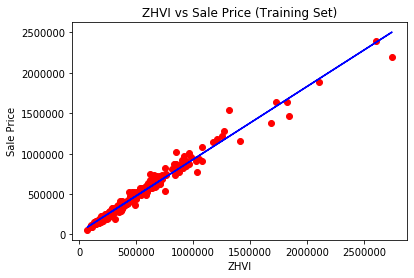

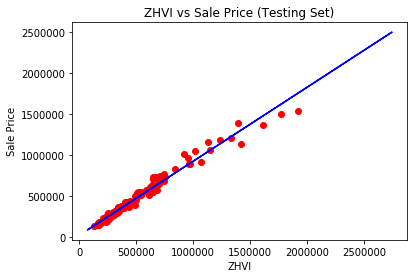

In [50]:
# Visualizing the Training results 
plt.scatter(X_Train, Y_Train, color = 'red')
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue') 
plt.title('ZHVI vs Sale Price (Training Set)')
plt.xlabel('ZHVI')
plt.ylabel('Sale Price')
plt.show()

# Visualizing the Test results 
plt.scatter(X_Test, Y_Test, color = 'red') 
plt.plot(X_Train, regressor.predict(X_Train), color = 'blue') 
plt.title('ZHVI vs Sale Price (Testing Set)')
plt.xlabel('ZHVI')
plt.ylabel('Sale Price')
plt.show()


In [51]:
Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("R Squared Train", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("R Squared Test", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

R Squared Train 0.9747880186800871
R Squared Test 0.9739853686918005


In [52]:
X1 = np.append(arr = np.ones((473,1)).astype(int), values = X1, axis = 1) #append to our array x 

regressor_OLS = sm.OLS(endog = y, exog = X1).fit()
regressor_OLS.summary()

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.815e+04
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -5779.7
No. Observations:                 473   AIC:                         1.156e+04
Df Residuals:                     471   BIC:                         1.157e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.849e+04   3913.446      7.280      0.000    2.08e+04    3.62e+04
x1             0.9000      0.007    134.706      0.000       0.887       0.913
==============================================================================
Omnibus:                       96.920   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2015.638
Skew:                           0.136   Prob(JB):                         0.00
Kurtosis:                      13.109   Cond. No.                     1.01e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model: Multiple Linear Regression. Target: Sale Price. All Inputs included 

In [53]:
X2 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','paid_on_claims_5year','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape) 

# Fitting Simple Linear Regression to Dataset Training data 
regressor = LinearRegression() 
regressor.fit(X_Train, Y_Train) 

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

# Accuracy 
print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 6)
(354,)
(119, 6)
(119,)
Training Accuracy 0.9766572620168382
Testing Accuracy 0.9720827731952083


In [54]:
X2 = np.append(arr = np.ones((473,1)).astype(int), values = X2, axis = 1) #append to our array x 

regressor_OLS = sm.OLS(endog = y, exog = X2).fit()
regressor_OLS.summary()

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     3192.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -5764.8
No. Observations:                 473   AIC:                         1.154e+04
Df Residuals:                     466   BIC:                         1.157e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.979e+04   1.55e+04      3.864      0.000    2.94e+04    9.02e+04
x1             0.8822      0.007    120.587      0.000       0.868       0.897
x2          -462.2995    315.421     -1.466      0.143   -1082.123     157.524
x3             0.0020      0.002      0.828      0.408      -0.003       0.007
x4          -104.9687    113.998     -0.921      0.358    -328.982     119.045
x5          -372.9791    106.324     -3.508      0.000    -581.912    -164.046
x6          5454.3910   2509.827      2.173      0.030     522.411    1.04e+04
==============================================================================
Omnibus:                       99.547   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2016.006
Skew:                           0.229   Prob(JB):                         0.00
Kurtosis:                      13.104   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model: MLR. Target: Sale Price. Inputs: Remove the Total Paid on FEMA claims
## Paid on FEMA claims had the highest P Value in prior iteration

In [55]:
X3 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X3, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape) 

# Fitting Simple Linear Regression to Dataset Training data 
regressor = LinearRegression() 
regressor.fit(X_Train, Y_Train) 

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

# Accuracy 
print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 5)
(354,)
(119, 5)
(119,)
Training Accuracy 0.9764119538357569
Testing Accuracy 0.9746989800830385


In [56]:
X3 = np.append(arr = np.ones((473,1)).astype(int), values = X3, axis = 1) #append to our array x 

regressor_OLS = sm.OLS(endog = y, exog = X3).fit()
regressor_OLS.summary()

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     3833.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -5765.1
No. Observations:                 473   AIC:                         1.154e+04
Df Residuals:                     467   BIC:                         1.157e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.534e+04   1.45e+04      3.815      0.000    2.68e+04    8.38e+04
x1             0.8826      0.007    120.847      0.000       0.868       0.897
x2          -423.6125    311.838     -1.358      0.175   -1036.392     189.167
x3           -15.7542     37.286     -0.423      0.673     -89.024      57.516
x4          -376.2040    106.216     -3.542      0.000    -584.925    -167.483
x5          6460.3269   2195.601      2.942      0.003    2145.847    1.08e+04
==============================================================================
Omnibus:                      100.283   Durbin-Watson:                   1.652
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2034.751
Skew:                           0.242   Prob(JB):                         0.00
Kurtosis:                      13.149   Cond. No.                     3.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model: MLR. Target: Sale Price. Inputs: Remove Count of FEMA claims
### Count of FEMA Claims had highest P-Value in prior iteration 

In [57]:
X4 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X4, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape) 

# Fitting Simple Linear Regression to Dataset Training data 
regressor = LinearRegression() 
regressor.fit(X_Train, Y_Train) 

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

# Accuracy 
print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 4)
(354,)
(119, 4)
(119,)
Training Accuracy 0.9763832843846778
Testing Accuracy 0.9752012951908998


In [58]:
X4 = np.append(arr = np.ones((473,1)).astype(int), values = X4, axis = 1) #append to our array x 

regressor_OLS = sm.OLS(endog = y, exog = X4).fit()
regressor_OLS.summary()

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     4799.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -5765.2
No. Observations:                 473   AIC:                         1.154e+04
Df Residuals:                     468   BIC:                         1.156e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.531e+04   1.45e+04      3.816      0.000    2.68e+04    8.38e+04
x1             0.8828      0.007    121.362      0.000       0.869       0.897
x2          -434.1673    310.563     -1.398      0.163   -1044.437     176.103
x3          -378.6784    105.962     -3.574      0.000    -586.898    -170.459
x4          6438.2128   2193.049      2.936      0.003    2128.770    1.07e+04
==============================================================================
Omnibus:                       99.409   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2015.478
Skew:                           0.225   Prob(JB):                         0.00
Kurtosis:                      13.103   Cond. No.                     3.87e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.87e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model: MLR Target: Sale Price Inputs: Remove Unemployment

In [59]:
X5b = clean.loc[:, ['ZHVI','COASTAL_FLOOD_EVENTS_96_19','DaysToSale']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X5b, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape) 

# Fitting Simple Linear Regression to Dataset Training data 
regressor = LinearRegression() 
regressor.fit(X_Train, Y_Train) 

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

# Accuracy 
print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 3)
(354,)
(119, 3)
(119,)
Training Accuracy 0.9758506202795338
Testing Accuracy 0.9750611880795866


In [60]:
X5b = np.append(arr = np.ones((473,1)).astype(int), values = X5b, axis = 1) #append to our array x 

regressor_OLS = sm.OLS(endog = y, exog = X5b).fit()
regressor_OLS.summary()

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             SALE_PRICE   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     6294.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):               0.00
Time:                        16:24:55   Log-Likelihood:                -5769.5
No. Observations:                 473   AIC:                         1.155e+04
Df Residuals:                     469   BIC:                         1.156e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.654e+04   1.27e+04      6.046      0.000    5.17e+04    1.01e+05
x1             0.8859      0.007    122.095      0.000       0.872       0.900
x2          -648.2888    304.319     -2.130      0.034   -1246.286     -50.292
x3          -368.5842    106.763     -3.452      0.001    -578.377    -158.792
==============================================================================
Omnibus:                       98.949   Durbin-Watson:                   1.638
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2056.543
Skew:                           0.194   Prob(JB):                         0.00
Kurtosis:                      13.208   Cond. No.                     3.35e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.35e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### We will return to model 4, because model 5 removed the variables of interest regarding the NOAA and FEMA affects of climate change 

## Model: MLR. Target: DIFFERENCE OF PRICE. Vars: All Six 

In [61]:
X5 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','paid_on_claims_5year','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'DIFF_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X5, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape) 

# Fitting Simple Linear Regression to Dataset Training data 
regressor = LinearRegression() 
regressor.fit(X_Train, Y_Train) 

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

# Accuracy 
print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 6)
(354,)
(119, 6)
(119,)
Training Accuracy 0.357809186178518
Testing Accuracy 0.3160234647946737


In [62]:
X5 = np.append(arr = np.ones((473,1)).astype(int), values = X5, axis = 1) #append to our array x 

regressor_OLS = sm.OLS(endog = y, exog = X5).fit()
regressor_OLS.summary()

# https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DIFF_PRICE   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     44.43
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           6.16e-43
Time:                        16:24:55   Log-Likelihood:                -5764.8
No. Observations:                 473   AIC:                         1.154e+04
Df Residuals:                     466   BIC:                         1.157e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.979e+04   1.55e+04      3.864      0.000    2.94e+04    9.02e+04
x1            -0.1178      0.007    -16.096      0.000      -0.132      -0.103
x2          -462.2995    315.421     -1.466      0.143   -1082.123     157.524
x3             0.0020      0.002      0.828      0.408      -0.003       0.007
x4          -104.9687    113.998     -0.921      0.358    -328.982     119.045
x5          -372.9791    106.324     -3.508      0.000    -581.912    -164.046
x6          5454.3910   2509.827      2.173      0.030     522.411    1.04e+04
==============================================================================
Omnibus:                       99.547   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2016.006
Skew:                           0.229   Prob(JB):                         0.00
Kurtosis:                      13.104   Cond. No.                     2.03e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### This model shows that we are correctly targeting the Sale Price, and not the difference in sale price between ZHVI and Sale Price 

## Decision Tree Regresion 

In [63]:
X6 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','paid_on_claims_5year','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']


# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X6, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape)

regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 0 )
regressor.fit(X_Train, Y_Train)

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 6)
(354,)
(119, 6)
(119,)
Training Accuracy 1.0
Testing Accuracy 0.9458932195358541


### Remove Paid on FEMA claims 

In [64]:
X7 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X7, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape)

regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 0 )
regressor.fit(X_Train, Y_Train)

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 5)
(354,)
(119, 5)
(119,)
Training Accuracy 1.0
Testing Accuracy 0.9492104022097505


## Remove FEMA Claim Counts 

In [65]:
X10 = clean.loc[:, ['ZHVI','COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X10, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape)

regressor = DecisionTreeRegressor(criterion = 'mse', random_state = 0 )
regressor.fit(X_Train, Y_Train)

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 4)
(354,)
(119, 4)
(119,)
Training Accuracy 1.0
Testing Accuracy 0.9371868815734847


## Random Forest 

In [66]:
X8 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','paid_on_claims_5year','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

y = np.ravel(y)

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X8, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape)

regressor = RandomForestClassifier(random_state = 614)
regressor.fit(X_Train, Y_Train)

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 6)
(354,)
(119, 6)
(119,)
Training Accuracy 1.0
Testing Accuracy 0.8263937312298033


In [67]:
X9 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','count_claims_5year','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

y = np.ravel(y)

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X9, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape)

regressor = RandomForestClassifier(random_state = 614)
regressor.fit(X_Train, Y_Train)

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 5)
(354,)
(119, 5)
(119,)
Training Accuracy 1.0
Testing Accuracy 0.8265857529647833


In [68]:
X12 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

y = np.ravel(y)

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X12, y, test_size = .25, random_state = 0)

print(X_Train.shape) 
print(Y_Train.shape) 
print(X_Test.shape) 
print(Y_Test.shape)

regressor = RandomForestClassifier(random_state = 614)
regressor.fit(X_Train, Y_Train)

Y_Pred_Train = regressor.predict(X_Train)
Y_Pred_Test = regressor.predict(X_Test)

print("Training Accuracy", r2_score(y_true = Y_Train , y_pred = Y_Pred_Train))
print("Testing Accuracy", r2_score(y_true = Y_Test , y_pred = Y_Pred_Test))

(354, 4)
(354,)
(119, 4)
(119,)
Training Accuracy 1.0
Testing Accuracy 0.9138109337039613


# (IV) Make Predictions Using the Best Regressor

## The Best is Regressor 4: the Multiple Linear Regressor with covariates of ZHVI, NOAA Number of Storms, The Days to Sale and the UnEmployment Rate 

In [69]:
X4 = clean.loc[:, ['ZHVI', 'COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate']]
y = clean.loc[:, 'SALE_PRICE']

# Split into Train & Test Set 
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X4, y, test_size = .25, random_state = 0)

# Fitting Simple Linear Regression to Dataset Training data 
regressor4 = LinearRegression() 
regressor4.fit(X_Train, Y_Train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
X_picks = clean.loc[:, ['ZHVI','COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate']]
Y_final = regressor4.predict(X_picks).astype(int)

X_zips = clean.loc[:, 'ZIP']
X_zhvi = clean.loc[:, 'ZHVI'].astype(int)
X_storms = clean.loc[:, 'COASTAL_FLOOD_EVENTS_96_19'].astype(int)
X_tts = clean.loc[:, 'DaysToSale'].astype(int)
X_unemploy = clean.loc[:, 'UnemploymentRate']
Y_old = clean.loc[:, 'SALE_PRICE'].astype(int)


In [71]:
pred_all = pd.DataFrame(zip(X_zips, X_zhvi, X_storms, X_tts, X_unemploy, Y_old, Y_final),
                       columns = ['ZIP','ZHVI','COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate','SALE_PRICE','PRED_PRICE'])

# The Percent Change is comparing our new Estimate to the ZHVI or Zillow Home Value Index Estimate 
pred_all['PercentChange'] = (pred_all['PRED_PRICE'] - pred_all['ZHVI']) / (pred_all['ZHVI'])

pred_all.to_csv('Outputs/Predictions_All.csv')

print(pred_all.dtypes)
pred_all.head()

ZIP                            object
ZHVI                            int64
COASTAL_FLOOD_EVENTS_96_19      int64
DaysToSale                      int64
UnemploymentRate              float64
SALE_PRICE                      int64
PRED_PRICE                      int64
PercentChange                 float64
dtype: object


,ZIP,ZHVI,COASTAL_FLOOD_EVENTS_96_19,DaysToSale,UnemploymentRate,SALE_PRICE,PRED_PRICE,PercentChange
0,10512,321020,19,146,4.2,293200,302505,-0.057676
1,10541,404514,19,146,4.2,383700,376535,-0.069167
2,10918,324180,15,149,4.0,287100,304304,-0.061312
3,10930,331235,15,149,4.0,322300,310560,-0.062418
4,10950,340904,15,149,4.0,335700,319133,-0.063863


In [72]:
pred_all.PercentChange.describe()

count    473.000000
mean      -0.017571
std        0.070037
min       -0.100139
25%       -0.062418
50%       -0.036706
75%       -0.003843
max        0.466324
Name: PercentChange, dtype: float64

### Add more predictions - since "SALE PRICE" was the limiting factor in our model, and we are no longer in training, let's filter our data and get more predictions 

In [73]:
combine.shape

covariates = combine.drop('SALE_PRICE', axis = 1)
covariates.dropna(how = 'any',inplace = True)

covariates.shape

(913, 12)

In [74]:
X_picks2 = covariates.loc[:, ['ZHVI','COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate']]
Y_final2 = regressor4.predict(X_picks2).astype(int)


X_zips2 = covariates.loc[:, 'ZIP']
X_zhvi2 = covariates.loc[:, 'ZHVI'].astype(int)
X_storms2 = covariates.loc[:, 'COASTAL_FLOOD_EVENTS_96_19'].astype(int)
X_tts2 = covariates.loc[:, 'DaysToSale'].astype(int)
X_unemploy2 = covariates.loc[:, 'UnemploymentRate']

pred_all2 = pd.DataFrame(zip(X_zips2, X_zhvi2, X_storms2, X_tts2, X_unemploy2, Y_final2),
                       columns = ['ZIP','ZHVI','COASTAL_FLOOD_EVENTS_96_19','DaysToSale','UnemploymentRate','PRED_PRICE'])


# The Percent Change is comparing our new Estimate to the ZHVI or Zillow Home Value Index Estimate 
pred_all2['PercentChange'] = (pred_all2['PRED_PRICE'] - pred_all2['ZHVI']) / (pred_all2['ZHVI'])

pred_all2.to_csv('Outputs/Predictions_All_WithMissingSales.csv')

print(pred_all2.dtypes)
print(pred_all2.shape)
pred_all2.head()

ZIP                            object
ZHVI                            int64
COASTAL_FLOOD_EVENTS_96_19      int64
DaysToSale                      int64
UnemploymentRate              float64
PRED_PRICE                      int64
PercentChange                 float64
dtype: object
(913, 7)


,ZIP,ZHVI,COASTAL_FLOOD_EVENTS_96_19,DaysToSale,UnemploymentRate,PRED_PRICE,PercentChange
0,10460,310286,7,114,5.3,317118,0.022018
1,10464,545632,7,114,5.3,525787,-0.036371
2,10465,511324,7,114,5.3,495368,-0.031205
3,10466,479213,7,114,5.3,466897,-0.025700
4,10475,390713,7,114,5.3,388428,-0.005848


In [75]:
pred_all2.PercentChange.describe()

count    913.000000
mean       0.015740
std        0.141324
min       -0.856835
25%       -0.064324
50%       -0.031752
75%        0.047689
max        0.997717
Name: PercentChange, dtype: float64